In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
data=pd.read_csv('/content/imbd sentiment analysis.csv')

In [ ]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
data=data.iloc[:2000,:]

In [ ]:
data.shape

(2000, 5)

In [ ]:
data.isnull().sum()

text          0
label         0
length        0
word_count    0
sent_count    0
dtype: int64

In [ ]:
data.duplicated().any()

False

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(2000, 5)

In [ ]:
data['length']=data['text'].apply(lambda x:len(x))

In [ ]:
data['word_count']=data['text'].apply(lambda x:len(x.split()))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['sent_count']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.sample(2)

,text,label,length,word_count,sent_count
35,Three writers made a valiant attempt to adapt ...,0,1043,163,7
1744,"I wanted to dog this movie, but somehow I can'...",0,1851,332,16


In [ ]:
data[data['label']==1]['word_count'].mean()

237.85896076352068

In [ ]:
data[data['label']==1]['length'].mean()

1351.2078472958642

In [ ]:
data[data['label']==1]['sent_count'].mean()

10.69777306468717

In [ ]:
data[data['label']==0]['word_count'].mean()

230.63292336802272

In [ ]:
data[data['label']==0]['length'].mean()

1300.546830652791

In [ ]:

data[data['label']==0]['sent_count'].mean()

11.14096499526963

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')

In [ ]:
custom_stopwords= {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', "mightn", "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't",'weren', "weren't", 'won', "won't", "wouldn", "wouldn't"}

In [ ]:
all_stopwords=set(all_stopwords)-custom_stopwords

In [ ]:
import re

In [ ]:
corpus=[]
for i in range(len(data)):
    text=re.sub('[^a-zA-z]'," ",data['text'][i])
    text=text.lower()
    text=text.split()
    text=[i for i in text if i not in all_stopwords]
    text=" ".join(text)
    corpus.append(text)



In [ ]:
data['processed_text']=corpus

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=500,min_font_size=8,background_color='white')

In [ ]:
positive=wc.generate(data[data['label']==1]['processed_text'].str.cat(sep=' '))

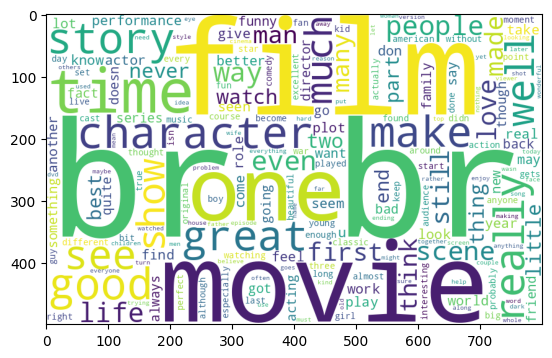

In [ ]:
plt.imshow(positive)

In [ ]:
negative=wc.generate(data[data['label']==0]['processed_text'].str.cat(sep=' '))

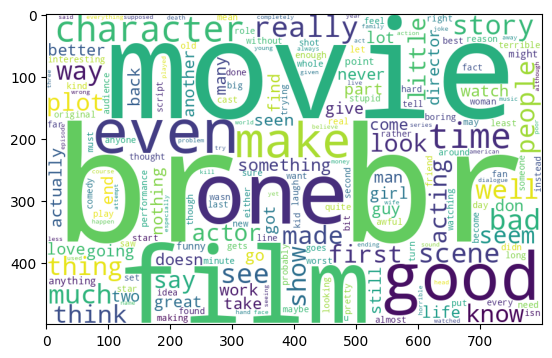

In [ ]:
plt.imshow(negative)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=3000)

In [ ]:
x=cv.fit_transform(corpus).toarray()
x.shape

(2000, 3000)

In [ ]:
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
rf_model=RandomForestClassifier()
svc_model=SVC(kernel='rbf')
xgb_model=XGBClassifier()

In [ ]:
rf_model.fit(x_train,y_train)
svc_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
rf_y_pred=rf_model.predict(x_test)
svc_y_pred=svc_model.predict(x_test)
xgb_y_pred=xgb_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(rf_y_pred,y_test)

0.7975

In [ ]:
accuracy_score(svc_y_pred,y_test)

0.8

In [ ]:
accuracy_score(xgb_y_pred,y_test)

0.8125

In [ ]:
xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import joblib
name="imbd sentiment analysis"
joblib.dump(xgb_model,name)

['imbd sentiment analysis']